In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

nvidia-smi 查看cuda情况
dir() 查看包内有什么
help() 查看帮助

In [3]:
from torch.utils.data import Dataset, DataLoader

PyTorch中的torch.utils.data.Dataset类是一个用于表示数据集的抽象类，它定义了访问数据样本及其标签的标准方式。以下是其核心作用和使用方法的详细说明：
Dataset 是一个抽象基类（Abstract Base Class），它定义了 __len__ 和 __getitem__ 这两个必须实现的方法，但具体如何加载数据、从哪里加载数据，完全由用户自定义。

核心作用

数据封装与标准化接口：

Dataset类将数据（如图像、文本等）及其标签封装为一个统一的对象，要求用户实现__len__和__getitem__方法。
__len__：返回数据集的样本总数。
__getitem__：根据索引返回对应的样本和标签（支持张量或其他格式）。

与DataLoader配合：

Dataset通常与DataLoader结合使用。DataLoader负责批量加载数据、多线程加速、数据打乱等操作，而Dataset专注于单个样本的读取和预处理。

灵活性：

内置数据集（如MNIST、CIFAR-10）已实现Dataset接口，可直接使用。
自定义数据集时，继承Dataset并实现关键方法，可处理任意存储格式的数据（如文件夹、CSV文件、数据库）。
实现自定义Dataset的步骤

继承Dataset类：

python
复制代码
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data          # 数据路径或数据本身
        self.labels = labels      # 标签
        self.transform = transform# 数据预处理（如transforms.Compose）

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, label


使用DataLoader加载：

python
复制代码
from torch.utils.data import DataLoader
dataset = CustomDataset(data, labels, transform=my_transforms)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

实际应用场景
图像处理：读取图片文件，应用数据增强（随机裁剪、翻转等）。
文本处理：加载文本数据并转换为词向量。
非标准数据：处理自定义存储结构的数据（如数据库查询结果）。
内置工具与优化

TensorDataset：若数据已存储在张量中，可直接使用TensorDataset快速封装。

python
复制代码
import torch
from torch.utils.data import TensorDataset
data_tensor = torch.tensor(...)
labels_tensor = torch.tensor(...)
dataset = TensorDataset(data_tensor, labels_tensor)


数据增强：通过torchvision.transforms模块定义预处理流程，并在__getitem__中应用。

注意事项
线程安全：确保__getitem__的实现是线程安全的（避免全局变量修改）。
高效读取：对于大规模数据（如图像），避免在__init__中一次性加载全部数据，应动态读取（如按需加载图片文件）。

总结来说，Dataset类是PyTorch数据处理流程的基石，通过自定义实现，用户能够灵活适配各种数据源和预处理需求，而DataLoader则在此基础上提供了高效的数据加载和管理功能。

In [4]:
from PIL import Image
import os

### 1、Dataset类学习

In [5]:
##os.path.dirname(path) 是 Python 的 os.path 模块中的一个函数，用于从一个文件路径中提取其所在目录的路径。它的核心功能是返回路径的父目录部分，常用于文件路径的解析和处理。
##D:\bigdata\dl_learning\dplearning_xiaotudui\hymenoptera_data\train\ants

In [6]:
class Mydata(Dataset):
    def __init__(self,root_dir,label_dir):
        self.root_dir=root_dir
        self.label_dir=label_dir
        self.path=os.path.join(self.root_dir,self.label_dir)
        self.img_path=os.listdir(self.path)

    def __getitem__(self, idx):
        img_name=self.img_path[idx]
        img_item_path=os.path.join(self.path,img_name)
        img=Image.open(img_item_path)
        return img,self.label_dir
    def __len__(self):
        return len(self.img_path)

In [7]:
root_dir=r'D:\bigdata\dl_learning\dplearning_xiaotudui\hymenoptera_data\train'
ants_data=Mydata(root_dir,'ants')

bees_path=Mydata(root_dir,'bees')

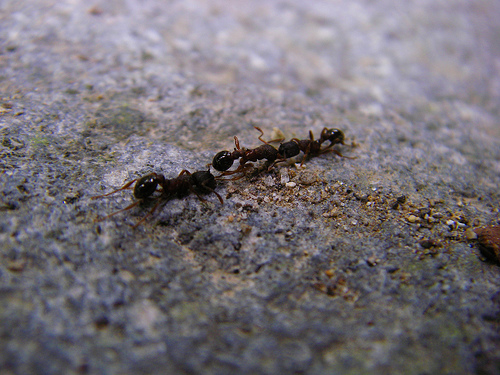

In [8]:
train_data=ants_data+bees_path

### 2、Tensorboard

In [2]:
import torch
from torch.utils.tensorboard import SummaryWriter
##pip install standard-imghdr tensorboard需要imghdr内置模块但不再支持需要装这个
# !tensorboard --logdir=logs --port=6007
import numpy as np
from PIL import Image
import os
img_path=r'D:\\bigdata\\dl_learning\\dplearning_xiaotudui\\practice_data\\train\\bees_image\\132826773_dbbcb117b9.jpg'
img=Image.open(img_path)
img_array=np.array(img)
tensorboard=SummaryWriter('logs')
writer = SummaryWriter('logs')
writer.add_image('train',img_array,2,dataformats='HWC')



In [3]:
for i in range(100):
    writer.add_scalar(tag='y=x',scalar_value=10*i,global_step=i)
writer.close()

### 3、transform

In [4]:
from torchvision import transforms

In [5]:
##tensor数据类型
##通过transforms.ToTensor来看两个问题
##1、transforms如何使用
##2、为什么需要Tensor数据类型

In [7]:
from torchvision import transforms
from PIL import Image
img_path=r'D:\bigdata\dl_learning\dplearning_xiaotudui\practice_data\train\ants_image\5650366_e22b7e1065.jpg'
img=Image.open(img_path)
tensor_trans=transforms.ToTensor()##totensor会把数值全部除以255
tensor_img=tensor_trans(img)


In [15]:
###Normalize则是可以按通道传入均值方差 对应归一化
##在训练模型时对每张图片单独标准化，应使用整个数据集的统计值 不应该对单个图片标准化
##所有需要预测的新数据（包括实际应用中的未知数据）必须使用训练集计算得到的均值和标准差进行标准化。这是确保数据预处理一致性的核心原则，具体原因和实施方法如下：
tensor_normal=transforms.Normalize(mean=[tensor_img[0].mean(), tensor_img[1].mean(), tensor_img[2].mean()],std=[tensor_img[0].std(), tensor_img[1].std(), tensor_img[2].std()])

In [19]:
tensor_normal(tensor_img)[0].std()

tensor(1.)

In [16]:
tensor_normal[0].std()

TypeError: 'Normalize' object is not subscriptable

In [ ]:
tensorboard=SummaryWriter('logs')
writer = SummaryWriter('logs')
writer.add_image('tensor',tensor_img,2)